April 15 2021

1) simulate brownian motion on three bounded axes (H 0-360, S 0-1, V 0-1)  
2) visualize this motion through time

In [163]:
X = [0, 1, 2]
Y = [0, 1, 2]
Z = [0, 1, 2]
C = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X, Y, Z, c = cc)
plt.show()

(11, 3)

In [404]:
from math import sqrt
from scipy.stats import norm
import numpy as np
from matplotlib import colors

def getHSVColorSteps(hsvStart, timesteps = 10, sigmasq = 1):
    #pass in a an np array row with [h,s,v]
    disps = norm.rvs(size=hsvStart.shape + (timesteps,), scale=np.sqrt(sigmasq))
    startwithdisp = np.column_stack((hsvStart, disps))
    return startwithdisp
    #h = cumsum_around_circle()

def cumsum_with_limits(values, ub=1, lb=0):
    ##takes a vector of steps under bm and calculates displacement assuming that boundaries reflect
    max_disp = ub-lb #maximum possible displacement through space
    delta_u = abs(ub - values[0]) # distance to upper and lower boundaries from initial step 
    delta_b = abs(lb - values[0])
    cumsum_values = []
    prior_disp, final_disp = 0,0
    
    def getDisp(reflect_disp, direction):
        # if headed towards ub, add disp to lb
        #if headed towards lb then subtract disp from ub
        if direction > 0: 
            disp = lb + reflect_disp
        else:
            disp = ub - reflect_disp
        return disp
     
    for ii, jj in np.ndenumerate(values):
#         print("type ub is {} type jj is {}".format(type(ub), type(jj)))
#         print("ub is {} jj is {}".format((ub), (jj)))
        delta_u = ub - prior_disp
        #print("ub is {} prior_disp is {}, delta_u is {}".format(ub, prior_disp, delta_u))
        delta_l = abs(prior_disp - lb)
        #print("lb is {} prior_disp is {}, delta_l is {}".format(lb, prior_disp, delta_l))
        unbounded_disp = prior_disp + jj #start disp + jj bounded_sum+jj
        if unbounded_disp <= ub and unbounded_disp >= lb: 
            final_disp = unbounded_disp
            #print("in between: final disp is {}".format(final_disp))
        elif unbounded_disp > ub:
            #print("unbounded_disp is {} which is greater than ub of {}".format(unbounded_disp, ub))
            reflect_disp = unbounded_disp - ub #anything in excess of ub gets reflected
            #print("unbound_disp: {}, delta_u: {}, reflect_disp: {}".format(unbounded_disp, delta_u, reflect_disp))
            direction = -1 # meaning that disp heads towards lb
            while reflect_disp > max_disp: # while the remaining displacement is large, bounce back and forth between boundaries
                reflect_disp = reflect_disp - max_disp
                direction = direction * -1 # bounce off boundary and change direction
            final_disp = getDisp(reflect_disp, direction)
        elif unbounded_disp < lb:
            #print("unbounded_disp: {}, lb: {}, delta_l: {} ".format(unbounded_disp, lb, delta_l))
            direction = 1 # move towards ub
            reflect_disp = abs(unbounded_disp) - abs(lb)
            #print("reflected displacement is {}".format(reflect_disp))
            while reflect_disp > max_disp:
                reflect_disp = reflect_disp - max_disp
                direction = direction * -1
            final_disp = getDisp(reflect_disp, direction)
        cumsum_values.append(final_disp)
        prior_disp = final_disp
    return cumsum_values

def cumsum_around_circle(values, ub=0, lb=0):
    ##if a value exceeds the ub, translate displacement to lb and vice versa
    cumsum_values = []
    bounded_sum = 0
    max_dist = ub-lb
    for ii, jj in np.ndenumerate(values):
        #print(ii,jj)
        if bounded_sum+jj <= ub and bounded_sum+jj >= lb: 
            bounded_sum += jj
            #print("in between: bounded sum is {}".format(bounded_sum))
            cumsum_values.append(bounded_sum)
        elif bounded_sum+jj >= ub:
            print("{} exceeds ub".format(bounded_sum+jj))
            excess = abs((bounded_sum+jj)-ub) 
            while excess > max_dist:
                diff = excess - max_dist
                print("excess of {}, passing through the entire space".format(excess))
                print("excess {} - maxdist {} = diff {}".format(excess, max_dist, diff))
                excess = excess - max_dist
            bounded_sum = lb + excess      
            cumsum_values.append(bounded_sum)
        elif bounded_sum+jj <= lb:
            print("{} exceeds lb".format(bounded_sum+jj))
            excess = abs(lb-(bounded_sum+jj)) 
            while excess > max_dist:
                print("excess of {}, passing through the entire space".format(excess))
                excess = excess - max_dist
            bounded_sum = ub - excess
            cumsum_values.append(bounded_sum)
        #print(ii, cumsum_values)
    return cumsum_values

def getStartVals(reps):
    svals = np.random.uniform(size = (reps,3))
    res = np.apply_along_axis(colors.is_color_like, 1, svals)
    if not (all(res)):
        print("{} is not a color like object. Trying again".format(res))
        getStartVals(reps)
    else:
        return svals
    
def getHSVSteps(steps, sigmasq=1, reps=1, startColor = None):
    #starting from a single color
    if not startColor.any():
        svals = np.array([0., 0., 0.])
        #svals = np.array([0., 1., 1.]) # hsv for red
        svals = np.repeat(svals, reps )
        #svals = getStartVals(reps)
    else:
        svals = startColor
        svals = np.repeat(svals, reps )
        
    disps = norm.rvs(size=svals.shape + (steps,), scale=np.sqrt(sigmasq))
    return(disps, svals)  

In [405]:
disps, svals = getHSVSteps(5, sigmasq = 0.01,startColor=np.array([0., 0., 0.]))

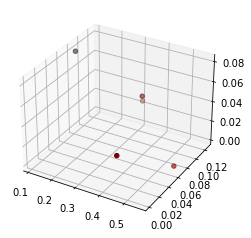

In [406]:
hh = cumsum_with_limits(disps[0])
ss = cumsum_with_limits(disps[1])
vv = cumsum_with_limits(disps[2])

colorcoordinates = np.array([hh,ss,vv])
colorcoordinates=colorcoordinates.transpose()
C = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(hh, ss, vv, c = colorcoordinates)
plt.show()

In [366]:
print(disps.shape, svals.shape)
print(disps, svals)

(3, 5) (3,)
[[ 0.12134001  1.50446765  0.67519579  0.55574581  0.31006616]
 [ 1.27695575 -0.73536139  0.63460006 -1.12148634 -0.92498755]
 [-0.64566368  0.72701995  0.36653    -1.48238758 -0.37751394]] [0. 0. 0.]


In [341]:
colors.rgb_to_hsv([255/255,0/255,0/255])

array([0., 1., 1.])

In [333]:
res, sv = getHSVSteps(10)

res
# r2 = np.apply_along_axis(cumsum_around_circle, -1, res, ub = 1, lb = 0) 
# r2


array([[[ 0.89967596,  0.37034027, -0.2669874 , -0.12704069,
          2.11017941, -0.21660673,  1.39306531, -0.89396089,
          2.08533929, -0.67405946],
        [-0.25573544, -0.35432868,  2.22542929,  1.20617582,
         -0.53999749,  1.44477213,  0.27471167,  0.2537601 ,
         -0.13704655, -1.08337294],
        [-0.82508907,  0.96673925, -1.15228581, -0.15104998,
          1.66910577,  0.68879126, -0.2074024 ,  0.31200958,
          0.56364261, -1.92726124]]])

In [334]:
import numpy as np
from scipy.stats import norm
import pandas as pd

steps = 10
sigmasq = 1
start = np.array([0.0, 0.0, 0.0]) #start color
disps = norm.rvs(size=start.shape + (steps,), scale=np.sqrt(sigmasq), random_state=12) #brownian evolution away from start
tdisp = np.column_stack((start, disps))
tdisp = tdisp.transpose()
tdisp
#tdisp[0,:] = cumsum_around_circle(tdisp[0,:], 1,0)
#cumsum_with_limits(tdisp[1:,:], 1,0)


#np.apply_along_axis(cumsum_with_limits, -1, tdisp[1:,:], ub = 1, lb = 0)
# array([[1, 3, 5],
#        [2, 4, 6]])

# arr[:,0] = arr[:,0] - 1 



# run tdisp through bounded cumsum
#hh = cumsum_around_circle(tdisp[0], 1, 0)
#sv = (tdisp[1:], 1, 0)


(array([[ 0.47298583, -0.59782292,  0.5018723 ],
        [-0.68142588,  0.47245699,  0.13884618],
        [ 0.2424395 ,  1.09595612,  0.64076111],
        [-1.70073563, -1.2151688 ,  0.52733267],
        [ 0.75314283,  1.34235637, -1.15436024],
        [-1.53472134, -0.12214979, -2.21333348],
        [ 0.00512708,  1.01251548, -1.68175651],
        [-0.12022767, -0.91386915, -1.78809425],
        [-0.80698188, -1.02953021, -2.21853495],
        [ 2.87181939,  1.20979645, -0.64743078]]),
 1,
 0)

In [99]:
print(tdisp)
cc = colors.hsv_to_rgb(tdisp).squeeze() 
cc

array([[[0.14915737, 0.11019423, 0.28547826, 0.22857267, 0.06240683,
         0.74232627, 0.56845621, 0.36389671, 0.92746457, 0.06804251],
        [0.70336452, 0.5552942 , 0.17020346, 0.82258508, 0.2910023 ,
         0.10877921, 0.13260546, 0.49327596, 0.94303418, 0.11172278],
        [0.75190814, 0.69030121, 0.14551991, 0.73010148, 0.7617762 ,
         0.42551701, 0.86820122, 0.20994725, 0.15379303, 0.62584365]],

       [[0.60472458, 0.10842851, 0.38643111, 0.79400687, 0.87238472,
         0.32149792, 0.69187   , 0.72171187, 0.22855593, 0.76538632],
        [0.84919576, 0.56685326, 0.39986488, 0.26575812, 0.01595539,
         0.70951899, 0.60124101, 0.52355235, 0.00213875, 0.65456071],
        [0.92255162, 0.67648524, 0.99155806, 0.45098212, 0.49628903,
         0.09069809, 0.79252198, 0.76866041, 0.05792324, 0.72928714]],

       [[0.07795156, 0.5190806 , 0.81921639, 0.77633079, 0.6920592 ,
         0.00872146, 0.31840783, 0.21548394, 0.14305149, 0.74239479],
        [0.28490197, 0.

In [96]:
r2.reshape(5,3,10)



array([[[9.87796515e-01, 2.84327320e-01, 5.70032086e-01, 4.05060377e-01,
         1.60512481e-01, 3.67249706e-01, 8.03913856e-01, 8.32904739e-01,
         2.37953228e-01, 2.73226764e-01],
        [9.60238272e-01, 4.38117753e-01, 5.08986097e-01, 8.76208111e-01,
         5.07949868e-02, 8.82213563e-01, 9.98751406e-01, 5.89813078e-01,
         4.30887479e-01, 9.38390890e-01],
        [9.35544081e-01, 4.23959983e-01, 9.90056402e-01, 1.59769366e-01,
         6.85055042e-02, 5.82816990e-02, 9.69247272e-01, 4.66039149e-01,
         3.71075388e-01, 5.55967948e-04]],

       [[2.37450469e-01, 6.41595016e-01, 9.22548024e-01, 1.35069883e-01,
         8.41618366e-01, 8.49035588e-01, 8.19311316e-01, 8.03631267e-01,
         8.89991631e-01, 5.39192666e-01],
        [7.97143813e-01, 7.19396913e-01, 5.81579386e-02, 7.58789262e-02,
         4.55358672e-01, 8.88575267e-01, 9.12059674e-01, 5.58356536e-02,
         4.31713944e-01, 5.01627837e-02],
        [5.95245010e-01, 5.78258090e-03, 8.27206330e-01, 5

In [92]:
r2

array([[[9.87796515e-01, 2.84327320e-01, 5.70032086e-01, 4.05060377e-01,
         1.60512481e-01, 3.67249706e-01, 8.03913856e-01, 8.32904739e-01,
         2.37953228e-01, 2.73226764e-01],
        [9.60238272e-01, 4.38117753e-01, 5.08986097e-01, 8.76208111e-01,
         5.07949868e-02, 8.82213563e-01, 9.98751406e-01, 5.89813078e-01,
         4.30887479e-01, 9.38390890e-01],
        [9.35544081e-01, 4.23959983e-01, 9.90056402e-01, 1.59769366e-01,
         6.85055042e-02, 5.82816990e-02, 9.69247272e-01, 4.66039149e-01,
         3.71075388e-01, 5.55967948e-04]],

       [[2.37450469e-01, 6.41595016e-01, 9.22548024e-01, 1.35069883e-01,
         8.41618366e-01, 8.49035588e-01, 8.19311316e-01, 8.03631267e-01,
         8.89991631e-01, 5.39192666e-01],
        [7.97143813e-01, 7.19396913e-01, 5.81579386e-02, 7.58789262e-02,
         4.55358672e-01, 8.88575267e-01, 9.12059674e-01, 5.58356536e-02,
         4.31713944e-01, 5.01627837e-02],
        [5.95245010e-01, 5.78258090e-03, 8.27206330e-01, 5

In [88]:
r2[0]

array([[9.87796515e-01, 2.84327320e-01, 5.70032086e-01, 4.05060377e-01,
        1.60512481e-01, 3.67249706e-01, 8.03913856e-01, 8.32904739e-01,
        2.37953228e-01, 2.73226764e-01],
       [9.60238272e-01, 4.38117753e-01, 5.08986097e-01, 8.76208111e-01,
        5.07949868e-02, 8.82213563e-01, 9.98751406e-01, 5.89813078e-01,
        4.30887479e-01, 9.38390890e-01],
       [9.35544081e-01, 4.23959983e-01, 9.90056402e-01, 1.59769366e-01,
        6.85055042e-02, 5.82816990e-02, 9.69247272e-01, 4.66039149e-01,
        3.71075388e-01, 5.55967948e-04]])

In [59]:
svals = getStartVals(5)
svals

array([[0.58896503, 0.33902567, 0.12937915],
       [0.22395336, 0.21454086, 0.41115265],
       [0.67116683, 0.68682587, 0.03323662],
       [0.89222763, 0.00314707, 0.741909  ],
       [0.59221258, 0.18823491, 0.20601332]])

In [54]:
all(res)

True

In [36]:
np.vectorize(colors.is_color_like)(tt)


array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import plot, show, grid, xlabel, ylabel
from matplotlib import colors
from scipy.stats import norm
sigmasq = 1.0 # brownian rate

# get start H, S, and V

## to generate HSV colors I need an H value between 0 and 360, a S between 0 and 1 and. V between 0 and 1

stHue = np.random.uniform(0, 360)
stSat = np.random.uniform()
stVal = np.random.uniform()

stHSV = np.array([stHue/360, stSat, stVal])


if colors.is_color_like(stHSV):
    print(stHSV)
else:
    print("not colorlike")

# get normal deviates for HSV
steps = 100
sigmasq = 1

r = norm.rvs(size=stHSV.shape + (steps,), scale=np.sqrt(sigmasq))

[0.14723144 0.06829379 0.71532527]


In [20]:
# call cumsum around circle for H and cumsumwithlimits for S and V
oo = cumsum_with_limits(r,  ub = 1, lb = 0)
len(oo)

300

In [ ]:
r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

# If `out` was not given, create an output array.
if out is None:
    out = np.empty(r.shape)

# This computes the Brownian motion by forming the cumulative sum of
# the random samples. 
np.cumsum(r, axis=-1, out=out)

# Add the initial condition.
out += np.expand_dims(x0, axis=-1)

return out

In [ ]:

# create HSV array from above
# translate to RGB
# call scatterplot e.g.

In [2]:
        # import numpy as np
        # import matplotlib.pyplot as plt

        # # Fixing random state for reproducibility
        # np.random.seed(19680801)


        # N = 50
        # x = np.random.rand(N)
        # y = np.random.rand(N)
        # colors = np.random.rand(N)
        # area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

        # plt.scatter(x, y, s=area, c=colors, alpha=0.5)
        # plt.show()

[0.78820224 0.4808438  0.27393219]


In [5]:
len(stHSV)

3

[0.45753301 0.22707292 0.47558202]
-10.60058935373907 exceeds lb
10.33367961453474 exceeds ub
-10.97104454826547 exceeds lb
10.416574727359947 exceeds ub
-10.269674739094771 exceeds lb
-10.877177023300689 exceeds lb
10.029160657841926 exceeds ub
-10.754786863282067 exceeds lb
10.663373439479004 exceeds ub
-10.532745371797326 exceeds lb
-10.270654226109142 exceeds lb
10.02441391522827 exceeds ub
-11.604842708186986 exceeds lb
10.139917108437466 exceeds ub
-10.483347363002682 exceeds lb
11.235726638459719 exceeds ub
-10.153334783807454 exceeds lb
10.280029700772554 exceeds ub
-10.323548436207329 exceeds lb
10.374123396365043 exceeds ub
-10.082592149248855 exceeds lb
10.445689200277812 exceeds ub
-10.687052135929997 exceeds lb
12.09042280975429 exceeds ub
-11.208662000369618 exceeds lb
11.567381860818383 exceeds ub
-10.713090106431961 exceeds lb
-12.158129908783039 exceeds lb
11.14265166783598 exceeds ub


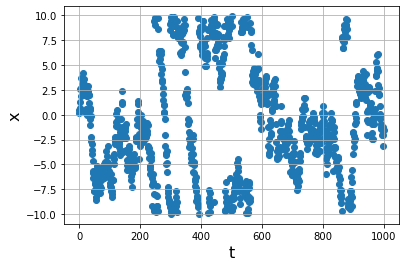

In [3]:
b = np.random.normal(size=1000, scale = np.sqrt(sigmasq))
bounded = cumsum_around_circle(b, 10, -10)



arr = numpy.array(bounded)
t = numpy.linspace(0.0, len(b), len(b))
plt.scatter(t, arr)
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

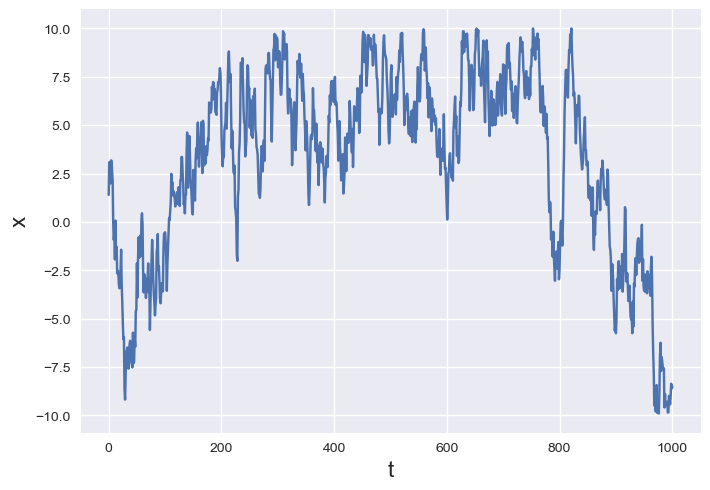

In [108]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

sigmasq = 1.0 # brownian rate

b = np.random.normal(size=1000, scale = np.sqrt(sigmasq))
bounded = cumsum_with_limits(b, 10, -10)
#print(bounded)
arr = numpy.array(bounded)
t = numpy.linspace(0.0, len(b), len(b))
plot(t, arr)
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [107]:
from matplotlib import colors
## to generate HSV colors I need an H value between 0 and 360, a S between 0 and 1 and. V between 0 and 1

stHue = np.random.uniform(0, 360)
stSat = np.random.uniform()
stVal = np.random.uniform()

stHSV = np.array([stHue/360, stSat, stVal])
if colors.is_color_like(stHSV):
    print(stHSV)
else:
    print("not colorlike")

[0.55027962 0.96089323 0.79661262]


3

In [100]:
n=3
from matplotlib import colors
R = np.ones((1,n,3)) #rows, #copies, #columns
R

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [101]:
R[0,:,0] = np.linspace(0, 1, n, endpoint=False)
print(R)
cc = colors.hsv_to_rgb(R).squeeze() 

[[[0.         1.         1.        ]
  [0.33333333 1.         1.        ]
  [0.66666667 1.         1.        ]]]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#convert hsv to rgb
mpl.hsv_to_rgb(hsv)[source]

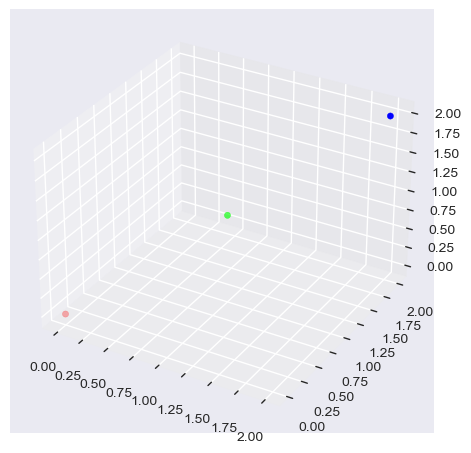

In [102]:
X = [0, 1, 2]
Y = [0, 1, 2]
Z = [0, 1, 2]
C = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X, Y, Z, c = cc)
plt.show()

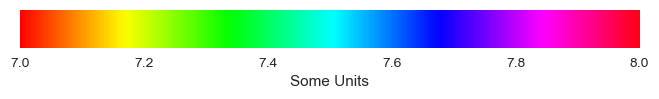

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(8, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.hsv
norm = mpl.colors.Normalize(vmin=7, vmax=8)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')

In [56]:
cmap = mpl.cm.hsv
cmap.N

256

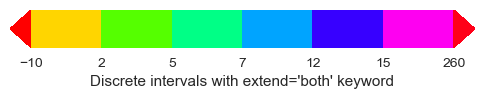

In [61]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.hsv
bounds = [-10, 2, 5, 7, 12, 15, 260]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")

AttributeError: 'ListedColormap' object has no attribute 'with_extremes'

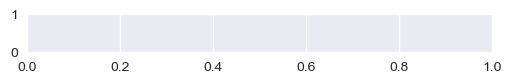

In [64]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = (mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan']).with_extremes(over='0.25', under='0.75'))

bounds = [1, 2, 4, 7, 8]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    boundaries=[0] + bounds + [13],  # Adding values for extensions.
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)

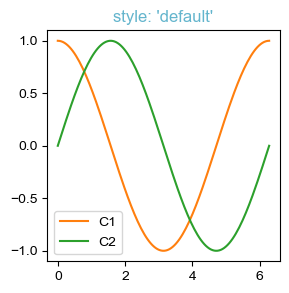

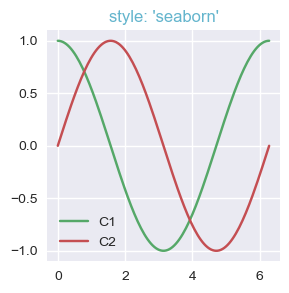

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128) # 128 evenly spaced numbers from 0 to 2pi


def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title('style: {!r}'.format(sty), color='C')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()


demo('default')
demo('seaborn')

In [22]:
    n = 3
    
    from matplotlib import colors
    R = np.ones((1,n,3))
    R[0,:,0] = np.linspace(0, 1, n, endpoint=False)
    #Note: could iterate and use colorsys.hsv_to_rgb
    colors.hsv_to_rgb(R).squeeze() 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
def main(imgsize):
    y, x = np.ogrid[6: -6: imgsize*2j, -6: 6: imgsize*2j]
    z = x + y*1j
    z = RiemannSphere(Klein(Mobius(Klein(z))))

    # define colors in hsv space
    H = np.sin(z[0]*np.pi)**2
    S = np.cos(z[1]*np.pi)**2
    V = abs(np.sin(z[2]*np.pi) * np.cos(z[2]*np.pi))**0.2
    HSV = np.stack((H, S, V), axis=2)

    # transform to rgb space
    img = hsv_to_rgb(HSV)
    fig = plt.figure(figsize=(imgsize/100.0, imgsize/100.0), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1], aspect=1)
    ax.axis('off')
    ax.imshow(img)
    fig.savefig('kaleidoscope.png')

main(100)

NameError: name 'RiemannSphere' is not defined

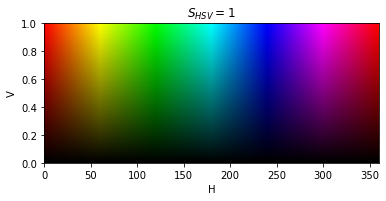

In [8]:
import numpy as np
import pylab as pl
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:300j]
S = np.ones_like(V)
HSV = np.dstack((H,S,V))
RGB = hsv_to_rgb(HSV)
pl.imshow(RGB, origin="lower", extent=[0, 360, 0, 1], aspect=150)
pl.xlabel("H")
pl.ylabel("V")
pl.title("$S_{HSV}=1$")
pl.show()

In [16]:
V, H = np.mgrid[0:1:2j, 0:1:2j]

In [19]:
S

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [17]:
H

array([[0., 1.],
       [0., 1.]])

## brownian evolution in a circle

1. pick a random starting point on a circle
2. for each time unit draw from the gaussian corrected for the circle, N(0,rt)
3. update position


In [12]:
import math
import random
import matplotlib as plt
R = 1 #radius
centerX = 0
centerY = 0


def rndCirclePoints(radius centerX=0, centerY=0)
    r = radius * math.sqrt(random.random())
    theta = random.random() * 2 * math.pi
    x = centerX + r * math.cos(theta)
    y = centerY + r * math.sin(theta)
    return[x,y]
    
xsamples = []
ysamples = []
for ii in range(100):
    samples.append
    

In [13]:
plt.plot(x,y,'ro') 


AttributeError: module 'matplotlib' has no attribute 'plot'

In [21]:
import matplotlib.pyplot as plt 
import numpy as np 
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        print(w)
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_HSV_normal(self,n_step=100):
        """
        Generate bounded brownian motion along three axes:
        H
        S
        V
        
        first lets try rescaling BM so it always lies between 0 and 1
        
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        print(w)
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

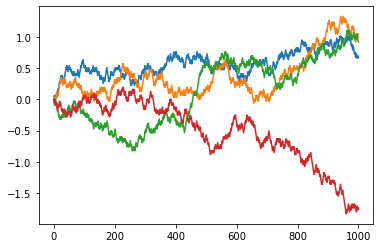

In [22]:
b = Brownian()
for i in range(4):
    plt.plot(b.gen_random_walk(1000))
plt.show()

In [25]:
b.x0

0.0

In [29]:
from scipy.stats import norm

# Process parameters
delta = 0.25
dt = 0.1

# Initial condition.
x = 0.0

# Number of iterations to compute.
n = 20

# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(x)

0.00011421196824965859
0.0012976303005199214
0.005014496227160182
0.017960150690831875
0.014736429425345575
0.01284003531265979
0.011849609410933017
0.011325725861776888
0.021749779846699728
0.024924972321294512
0.02047119489641791
0.019745188269771917
0.03784457859350377
0.04723163653897985
0.04934772311593643
0.05570106722338486
0.04982494596126947
0.0591667749784039
0.05310054893274175
0.05532848303982967


In [32]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [119]:
t = numpy.linspace(0.0, N*dt, N+1)
t[1]

1.0

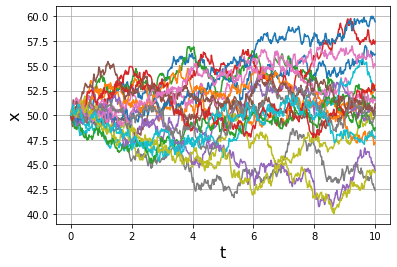

In [33]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [34]:
## now repeat the above example but use a boundary of

ub = 10.0
lb = 10.0

## if the process exceeds these boundaries it will be reflected back

def boundedBrownian(x0, n, dt, sigma, out=None, ub=None, lb = None):
    
    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=sigma*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out


In [80]:
# The Wiener process parameter.
sigma = 1
# Total time.
T = 10.0
# Number of steps.
N = 10
# Time step size
dt = T/N
# Number of realizations to generate.
m = 1
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 0

In [82]:

r = norm.rvs(size=x.shape + (10,), scale=sigma*sqrt(dt))
#r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

In [84]:
a = np.random.randint(-100, 100, 10000)
b = a/100

In [85]:
a

array([ 0, 57, 23, ...,  4, 97, -4])

In [86]:
b

array([ 0.  ,  0.57,  0.23, ...,  0.04,  0.97, -0.04])

In [193]:
len(b)

100

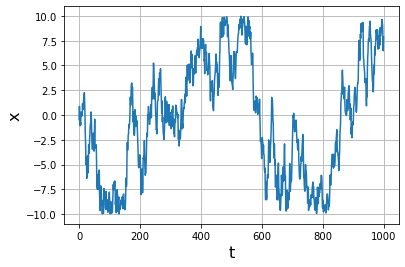